In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
train_values = pd.read_csv('train_values.csv')
train_labels = pd.read_csv('train_labels.csv')

In [83]:
train_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [84]:
train_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [85]:
#Cual fue la regiòn de level 1 màs dañada?
train_values_with_damage = train_values.merge(train_labels,how='inner')
train_values_with_damage.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [86]:
#Cual fue la regiòn de level 1 mas dañada?
train_values_by_geo_level_one = train_values_with_damage.filter(items=['building_id','geo_level_1_id','damage_grade'])
train_values_by_geo_level_one.head()

,building_id,geo_level_1_id,damage_grade
0,802906,6,3
1,28830,8,2
2,94947,21,3
3,590882,22,2
4,201944,11,3


In [87]:
train_values_by_geo_level_one=train_values_by_geo_level_one.filter(items=[
    'geo_level_1_id','damage_grade']).groupby(['geo_level_1_id']).agg('mean').reset_index()
train_values_by_geo_level_one=train_values_by_geo_level_one.rename(columns={'damage_grade':'damage_grade_mean'})
train_values_by_geo_level_one.loc[train_values_by_geo_level_one[
   'damage_grade_mean']==train_values_by_geo_level_one['damage_grade_mean'].max()]

,geo_level_1_id,damage_grade_mean
17,17,2.79448


In [88]:
#Cual fue la regiòn de level 1 menos dañada?
train_values_by_geo_level_one.loc[train_values_by_geo_level_one[
   'damage_grade_mean']==train_values_by_geo_level_one['damage_grade_mean'].min()]

,geo_level_1_id,damage_grade_mean
26,26,1.730887


In [89]:
#promedio de daño por antiguedad de edificaciòn
train_values_by_age = train_values_with_damage.filter(items=['age','damage_grade'])
train_values_by_age=train_values_by_age.groupby('age').agg('mean').reset_index()
train_values_by_age = train_values_by_age.rename(columns={'damage_grade':'damage_grade_mean'})
train_values_by_age.head()

,age,damage_grade_mean
0,0,1.957529
1,5,2.103481
2,10,2.200689
3,15,2.263455
4,20,2.300510


Text(0.5, 1.0, 'Edad vs Daños')

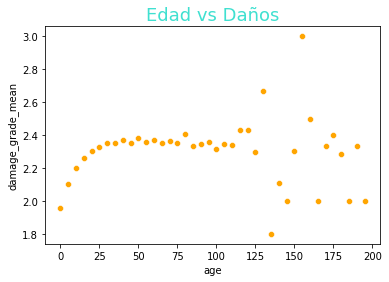

In [90]:
#eliminamos la edad de 995 para que se aprecie mejor la gràfica
train_values_by_age=train_values_by_age.head(40)
g= sns.scatterplot(x='age',y='damage_grade_mean',data=train_values_by_age,color='orange')
g.set_title('Edad vs Daños',fontsize=18,color='turquoise')